In [1]:
# Imort libaries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
# Load Boston dataset

boston_data = load_boston()
boston_dataset = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_dataset['target'] = pd.Series(boston_data.target)
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Check null values

boston_dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [4]:
# Split dataset to test , train

from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(boston_dataset, test_size=0.2)

In [5]:
# Analyze statistics

training_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.813844,11.165842,11.264728,0.069307,0.558346,6.287559,68.544554,3.768673,9.710396,411.665842,18.426238,356.586881,12.700941,22.406931
std,9.244929,23.317604,6.930717,0.254290,0.118469,0.705569,27.529905,2.104650,8.754030,169.979782,2.193970,92.091265,7.183099,9.212458
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.080050,0.000000,5.175000,0.000000,0.453000,5.878750,45.325000,2.100525,4.000000,281.000000,17.000000,375.997500,7.135000,16.600000
50%,0.260420,0.000000,9.795000,0.000000,0.538000,6.211500,76.700000,3.122200,5.000000,334.000000,19.000000,392.010000,11.350000,21.200000
75%,3.694070,12.500000,18.100000,0.000000,0.647000,6.618250,93.650000,5.118000,24.000000,666.000000,20.200000,396.900000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


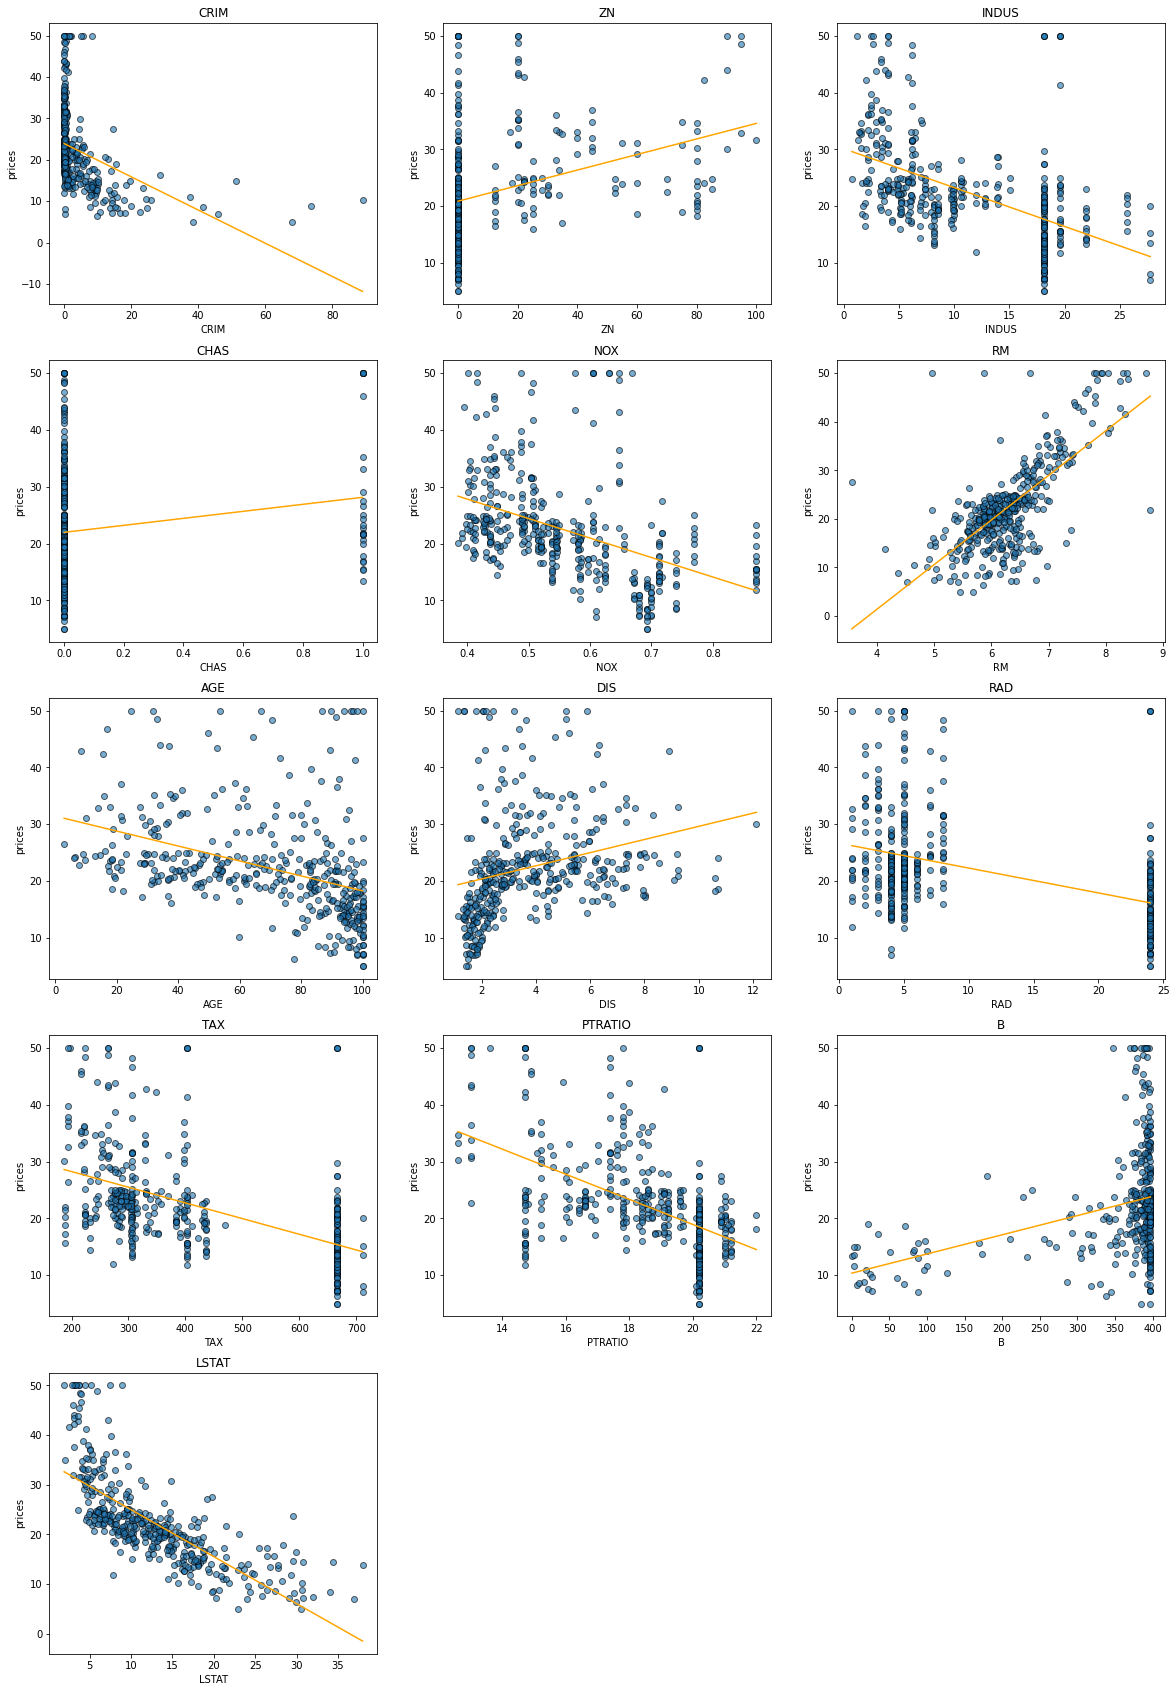

In [6]:
# Plot scatter of each feature and target

plt.figure(figsize=(20, 30))
Y_train = training_data['target']
X_train = training_data.drop(['target'],axis=1)
for i, col in enumerate(X_train):
    plt.subplot(5 , 3 , i+1)
    x = training_data[col]
    plt.scatter(x,Y_train,cmap="Blues", alpha=0.6, edgecolor='black')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, Y_train, 1))(np.unique(x)),color = 'orange')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

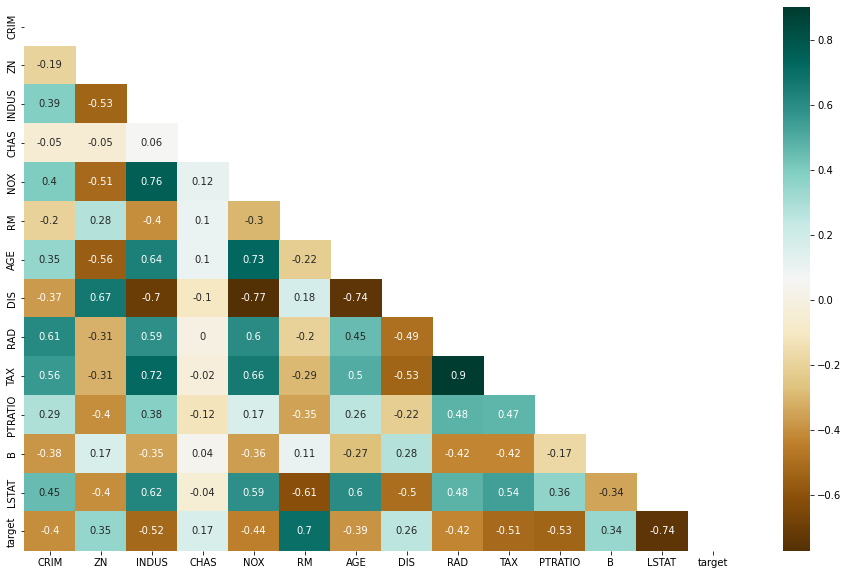

In [7]:
# Plot correlation heatmap

plt.subplots(figsize=(16,10))
mask = np.triu(np.ones_like(boston_dataset.corr(), dtype=np.bool))
sns.heatmap(training_data.corr().round(2),mask=mask,annot=True,cmap='BrBG',square=False)


# As you can see there is a high correlation between target and features like LSTAT and RM.
# Also from scatter plots from earlier section we can understand AGE and NOX can be useful for learning

In [8]:
# Prepare train and test data
# I use every feature for training

Y_train = training_data['target'].to_numpy()
X_train = training_data.drop(['target'],axis=1).to_numpy()
X_train = np.c_[X_train , np.ones(len(X_train))]

X_test = testing_data.drop(['target'],axis=1).to_numpy()
X_test = np.c_[X_test , np.ones(len(X_test))]
Y_test = testing_data['target']

In [9]:
# Implementation of linear regression

class MyLinearRegression():
  def __init__(self):
    self.W = None
  def fit(self,X , y):
    pinverse=np.linalg.pinv(X.T@X)
    self.W = pinverse@(X.T)@y

  def predict(self,X):
    return X@self.W




In [10]:
# Functions for plots and MSE 

def plot_target_predict(ax, fig, x, y, label):
  ax.scatter(x,y,cmap="Blues", alpha=0.6, edgecolor='black')
  lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()]), ]
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,color='orange')
  plt.title(label)
  plt.show() 
def mean_squared_error(target, predicted):
  return np.square(np.subtract(target,predicted)).mean()

# Part 3

test MSE :  28.250241676243554


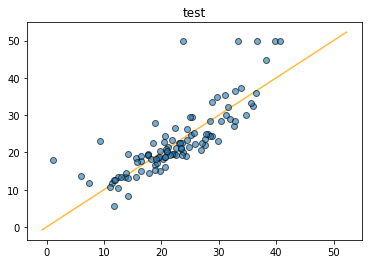

train MSE :  20.53207419416475


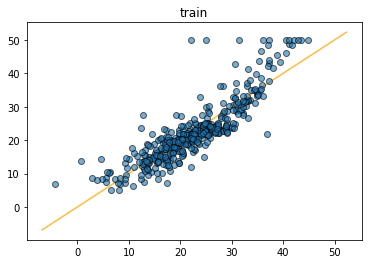

In [11]:
# Simple linear regression

lr = MyLinearRegression()
lr.fit(X_train,Y_train)



test_predicted = lr.predict(X_test)
print("test MSE : ",mean_squared_error(Y_test, test_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,test_predicted,Y_test,"test")


train_predicted = lr.predict(X_train)
print("train MSE : ",mean_squared_error(Y_train, train_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,train_predicted,Y_train,"train")

# Part 4

In [12]:
# add 2nd order of features

X_train = np.c_[X_train[:,:-1],np.power(X_train[:,:-1],2),np.ones(len(X_train))]
X_test = np.c_[X_test[:,:-1],np.power(X_test[:,:-1],2),np.ones(len(X_test))]

test MSE :  17.864385676024696


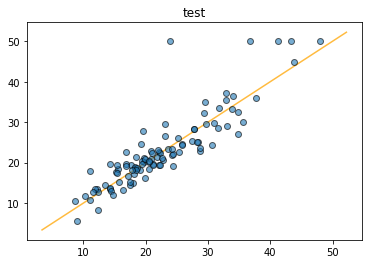

train MSE :  13.811764778502276


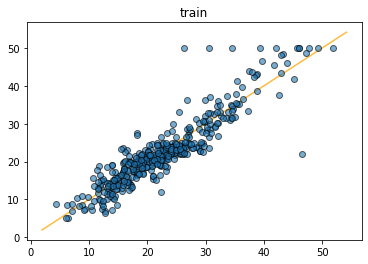

In [13]:
# Train with 1st and 2nd order of features
from sklearn.linear_model import LinearRegression

lr = MyLinearRegression()
lr.fit(X_train,Y_train)

l2 = LinearRegression()
l2.fit(X_train,Y_train)
pp = l2.predict(X_train)

test_predicted = lr.predict(X_test)
print("test MSE : ",mean_squared_error(Y_test, test_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,test_predicted,Y_test,"test")



train_predicted = lr.predict(X_train)
print("train MSE : ",mean_squared_error(Y_train, train_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,train_predicted,Y_train,"train")


# Part 5

In [14]:
# Add gaussian basis functions to features 

def gaussian_basis(X, Mj, S):
  new_features = [np.exp(-np.true_divide(np.power(np.linalg.norm(X - Mj[i],axis=1),2),(2.0*S**2))) for i in range(len(Mj))]
  return np.c_[new_features].T

Mj = training_data.drop(['target'],axis=1).sample(n=10).to_numpy()

X_train = training_data.drop(['target'],axis=1).to_numpy()

X_test = testing_data.drop(['target'],axis=1).to_numpy()

new_train_set = np.c_[X_train, np.power(X_train,2), gaussian_basis(X_train, Mj, 1)]
new_test_set = np.c_[X_test, np.power(X_test,2), gaussian_basis(X_test, Mj, 1)]





test MSE :  19.149193681591445


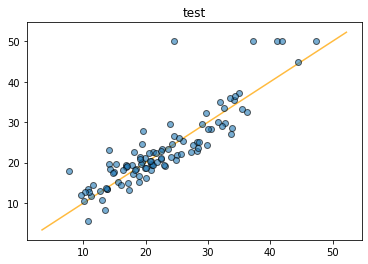

train MSE :  16.16845640312032


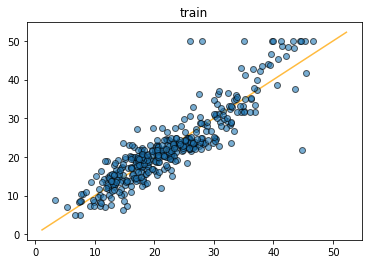

In [15]:
# learn with gaussian basis functions

lr = MyLinearRegression()
lr.fit(new_train_set,Y_train)


test_predicted = lr.predict(new_test_set)
print("test MSE : ",mean_squared_error(Y_test, test_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,test_predicted,Y_test,"test")



train_predicted = lr.predict(new_train_set)
print("train MSE : ",mean_squared_error(Y_train, train_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,train_predicted,Y_train,"train")

# with just gaussian basis as features, we will get high MSE error.
# with the results we got from former parts, it is better to use gaussian method along with the features.
# So the second approach was the best and then third.
# But if we normalize our dataset and then use gaussian basis most of the time it will perform better than others. below you can see these approach.

test MSE :  16.86334851010329


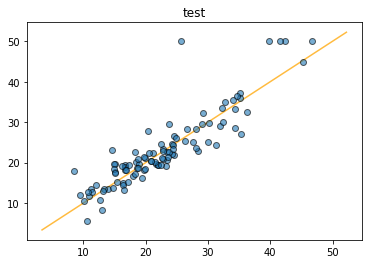

train MSE :  14.22940765968899


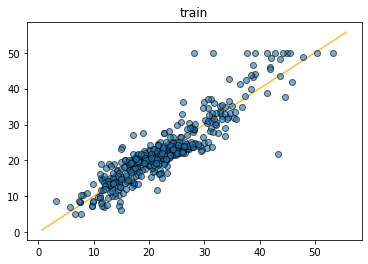

In [16]:
normalized_training_data = training_data.drop(['target'],axis=1)
normalized_training_data = (normalized_training_data-normalized_training_data.mean())/normalized_training_data.std()

normalized_testing_data = testing_data.drop(['target'],axis=1)
normalized_testing_data = (normalized_testing_data-normalized_testing_data.mean())/normalized_testing_data.std()


Mj = normalized_training_data.sample(n=10).to_numpy()

X_train = training_data.drop(['target'],axis=1).to_numpy()
normalized_X_train = normalized_training_data.to_numpy()

X_test = testing_data.drop(['target'],axis=1).to_numpy()
normalized_X_test = normalized_testing_data.to_numpy()


new_train_set = np.c_[X_train, np.power(X_train,2), gaussian_basis(normalized_X_train, Mj, 1)]
new_test_set = np.c_[X_test, np.power(X_test,2), gaussian_basis(normalized_X_test, Mj, 1)]


lr = MyLinearRegression()
lr.fit(new_train_set,Y_train)


test_predicted = lr.predict(new_test_set)
print("test MSE : ",mean_squared_error(Y_test, test_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,test_predicted,Y_test,"test")



train_predicted = lr.predict(new_train_set)
print("train MSE : ",mean_squared_error(Y_train, train_predicted))
fig, ax = plt.subplots()
plot_target_predict(ax,fig,train_predicted,Y_train,"train")